<a href="https://colab.research.google.com/github/mdjabedmollah/ml-learning/blob/main/K_Means_Clustering_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
df=pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/kmeans/student_clustering.csv")
df.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


Text(0, 0.5, 'iq')

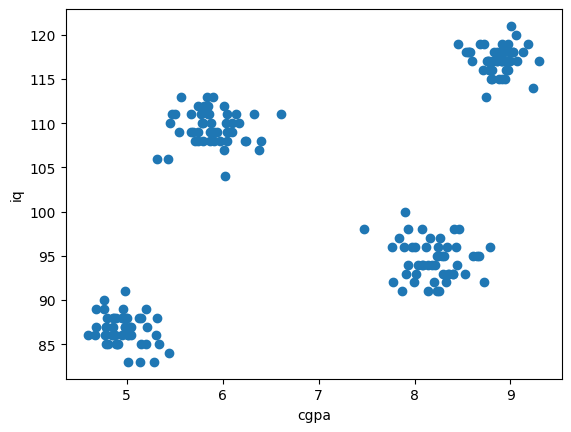

In [116]:

plt.scatter(df.cgpa, df['iq'])
plt.xlabel("cgpa")
plt.ylabel("iq")



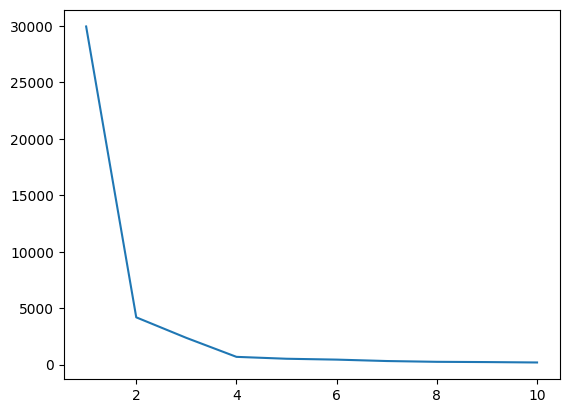

In [117]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', random_state=42)
    km.fit(df)
    wcss.append(km.inertia_)
wcss

plt.plot(range(1, 11), wcss)


In [118]:


km=KMeans(n_clusters=4)
y_predicted=km.fit_predict(df[['cgpa','iq']])
y_predicted

array([1, 2, 3, 3, 2, 2, 3, 0, 2, 3, 1, 2, 3, 1, 2, 3, 2, 3, 2, 2, 3, 1,
       3, 1, 1, 3, 1, 0, 3, 2, 0, 2, 0, 2, 3, 3, 0, 2, 1, 2, 1, 3, 3, 1,
       0, 0, 3, 2, 0, 2, 1, 1, 0, 3, 0, 2, 2, 0, 2, 0, 2, 3, 3, 0, 1, 0,
       3, 1, 2, 3, 2, 0, 3, 1, 2, 0, 2, 0, 1, 3, 3, 0, 2, 1, 0, 1, 0, 2,
       0, 2, 0, 0, 3, 1, 3, 3, 0, 3, 1, 0, 2, 1, 1, 0, 1, 1, 3, 1, 0, 0,
       3, 0, 2, 2, 3, 0, 3, 2, 0, 1, 1, 2, 3, 0, 3, 1, 3, 2, 1, 3, 3, 2,
       1, 1, 2, 0, 2, 1, 3, 3, 3, 1, 2, 1, 1, 0, 1, 0, 2, 1, 0, 1, 0, 0,
       1, 3, 2, 0, 2, 3, 1, 0, 2, 3, 0, 1, 2, 1, 1, 0, 0, 2, 0, 1, 1, 3,
       0, 2, 1, 0, 0, 2, 2, 2, 3, 1, 3, 3, 0, 2, 3, 3, 1, 1, 3, 1, 0, 2,
       2, 0], dtype=int32)

In [119]:
df['cluster']=y_predicted
df.head()

,cgpa,iq,cluster
0,5.13,88,1
1,5.90,113,2
2,8.36,93,3
3,8.27,97,3
4,5.45,110,2


In [120]:
km.cluster_centers_

array([[  8.8714, 117.16  ],
       [  4.9676,  86.7   ],
       [  5.8948, 109.52  ],
       [  8.1998,  94.6   ]])

In [121]:
df1=df[df.cluster==1]
df2=df[df.cluster==2]
df3=df[df.cluster==3]

/tmp/ipython-input-122-4165914339.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


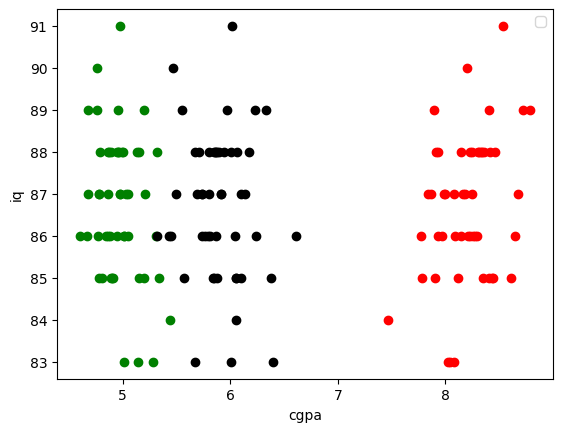

In [122]:
plt.scatter(df1.cgpa,df1.iq,color="green")
plt.scatter(df2.cgpa,df1.iq,color="black")
plt.scatter(df3.cgpa,df1.iq,color="red")
plt.xlabel('cgpa')
plt.ylabel('iq')
plt.legend()

In [126]:
scaler=MinMaxScaler()
scaler.fit(df[['cgpa']])
df['cgpa']=scaler.transform(df[['cgpa']])
scaler.fit(df[['iq']])
df['iq']=scaler.transform(df[['iq']])
df.head()

,cgpa,iq,cluster,cgpa_scaler
0,0.112766,0.131579,1,0.112766
1,0.276596,0.789474,2,0.276596
2,0.800000,0.263158,3,0.800000
3,0.780851,0.368421,3,0.780851
4,0.180851,0.710526,2,0.180851


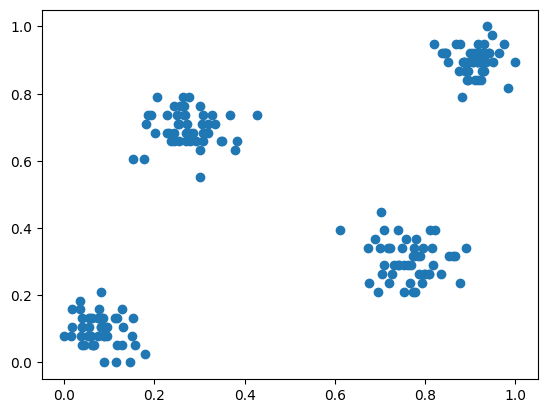

In [127]:
plt.scatter(df.cgpa, df['iq'])
